In [1]:
from wav2lip_train import train, Dataset, Wav2Lip
from os.path import dirname, join, basename, isfile
from tqdm import tqdm

from models import SyncNet_color as SyncNet
from models import Wav2Lip as Wav2Lip
import audio

import torch
from torch import nn
from torch import optim
import torch.backends.cudnn as cudnn
from torch.utils import data as data_utils
import numpy as np
from IPython.display import clear_output

from glob import glob

import os, random, cv2, argparse
from hparams import hparams, get_image_list

import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_dataset = Dataset('train')
test_dataset = Dataset('val')

train_data_loader = data_utils.DataLoader(
    train_dataset, batch_size=hparams.batch_size, shuffle=True,
    num_workers=hparams.num_workers)

test_data_loader = data_utils.DataLoader(
    test_dataset, batch_size=hparams.batch_size,
    num_workers=4)

device = torch.device("cuda" if use_cuda else "cpu")

# Model
model = Wav2Lip().to(device)

optimizer = optim.Adam([p for p in model.parameters() if p.requires_grad],
                        lr=hparams.initial_learning_rate)

# Train!
epochs, train_loss, test_loss = train(device, model, train_data_loader, test_data_loader, optimizer)

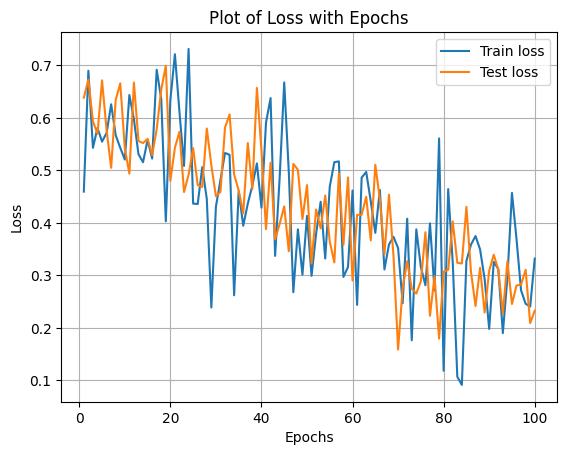

In [3]:
plt.plot(epochs, train_loss, marker='', linestyle='-', label='Train loss')
plt.plot(epochs, test_loss, marker='', linestyle='-', label='Test loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Loss with Epochs')
plt.legend()

plt.grid(True)
plt.show()


In [4]:
print('Test loss:', test_loss[-1])

Test loss: 0.2347847368273642
